In [3]:
import pandas as pd

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
df = fetch_openml('titanic',version=1,as_frame=True)['data']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [7]:
df.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,True,False,True,True,True


In [8]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [23]:
import seaborn as sns


<Axes: >

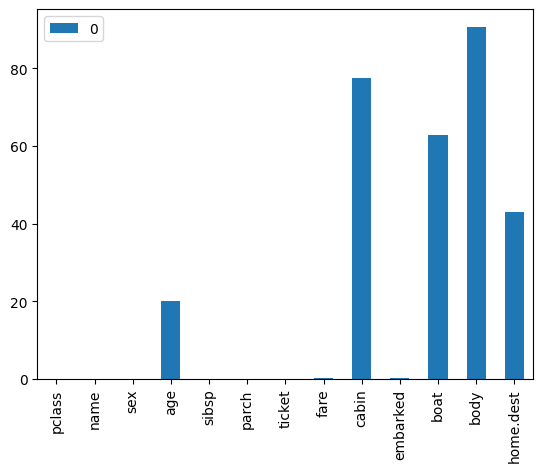

In [9]:
# sns.set()
miss_val_per = pd.DataFrame((df.isnull().sum()/len(df))*100)
miss_val_per.plot(kind='bar')



In [10]:
print(f"Size of the dataset: {df.shape}")

Size of the dataset: (1309, 13)


In [11]:
df.drop('body', axis=1, inplace=True)
print(f"Size of the dataset after dropping a feature: {df.shape}")

Size of the dataset after dropping a feature: (1309, 12)


In [12]:
from sklearn.impute import SimpleImputer


In [13]:
print(f"Number of NUll values before imputing: {df.age.isnull().sum()}")

Number of NUll values before imputing: 263


In [15]:
imp = SimpleImputer(strategy='mean')
df['age'] = imp.fit_transform(df[['age']])
print(f"Number of null values in age column after imputation: {df.age.isnull().sum()}")

Number of null values in age column after imputation: 0


In [24]:
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == "float64" or df[col].dtype == "int64" or df[col].dtype == "int32":
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        
       
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values': missing_values, 'strategy': strategy}
    
    return parameters

get_parameters(df)

{'fare': {'missing_values': nan, 'strategy': 'mean'},
 'cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': nan, 'strategy': 'most_frequent'},
 'home.dest': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [33]:
parameters = get_parameters(df)
for col,param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values , strategy=strategy)
    df[col] = imp.fit_transform(df[[col]])


ValueError: 2